In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os

# Training Data Info

In [32]:
data_path = os.getcwd() + '/../../data'
raw_train_path = f'{data_path}/raw/asl_alphabet_train/'
train_path = f'{data_path}/train/'
test_path = f'{data_path}/test/'
val_path = f'{data_path}/val/'

train_all = sorted(glob(raw_train_path + '*/'))

In [3]:
from collections import defaultdict

info = defaultdict(int)
total = 0
for train_class_path in train_all:
    train_class = train_class_path.split('/')[-2]
    train_class_data = glob(train_class_path + '*.jpg')
    info[train_class] = len(train_class_data)
    total += len(train_class_data)

print(f'# Training Images: {total}')
print(f'# Classes: {len(info.keys())}')
info

# Training Images: 87000
# Classes: 29


defaultdict(int,
            {'A': 3000,
             'B': 3000,
             'C': 3000,
             'D': 3000,
             'E': 3000,
             'F': 3000,
             'G': 3000,
             'H': 3000,
             'I': 3000,
             'J': 3000,
             'K': 3000,
             'L': 3000,
             'M': 3000,
             'N': 3000,
             'O': 3000,
             'P': 3000,
             'Q': 3000,
             'R': 3000,
             'S': 3000,
             'T': 3000,
             'U': 3000,
             'V': 3000,
             'W': 3000,
             'X': 3000,
             'Y': 3000,
             'Z': 3000,
             'del': 3000,
             'nothing': 3000,
             'space': 3000})

# Example Images

In [4]:
import cv2 as cv

def get_image(path):
    img = cv.imread(path)
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [5]:
def disp_images(images, image_names):
    rows = len(images) // 2
    rows = rows if len(images) % 2 == 0 else rows + 1
    fig, axs = plt.subplots(rows,2, figsize=(20, 20))
    ax = axs.flat

    for i, (image, image_name) in enumerate(zip(images, image_names)):
        ax[i].imshow(image)
        ax[i].title.set_text(image_name)

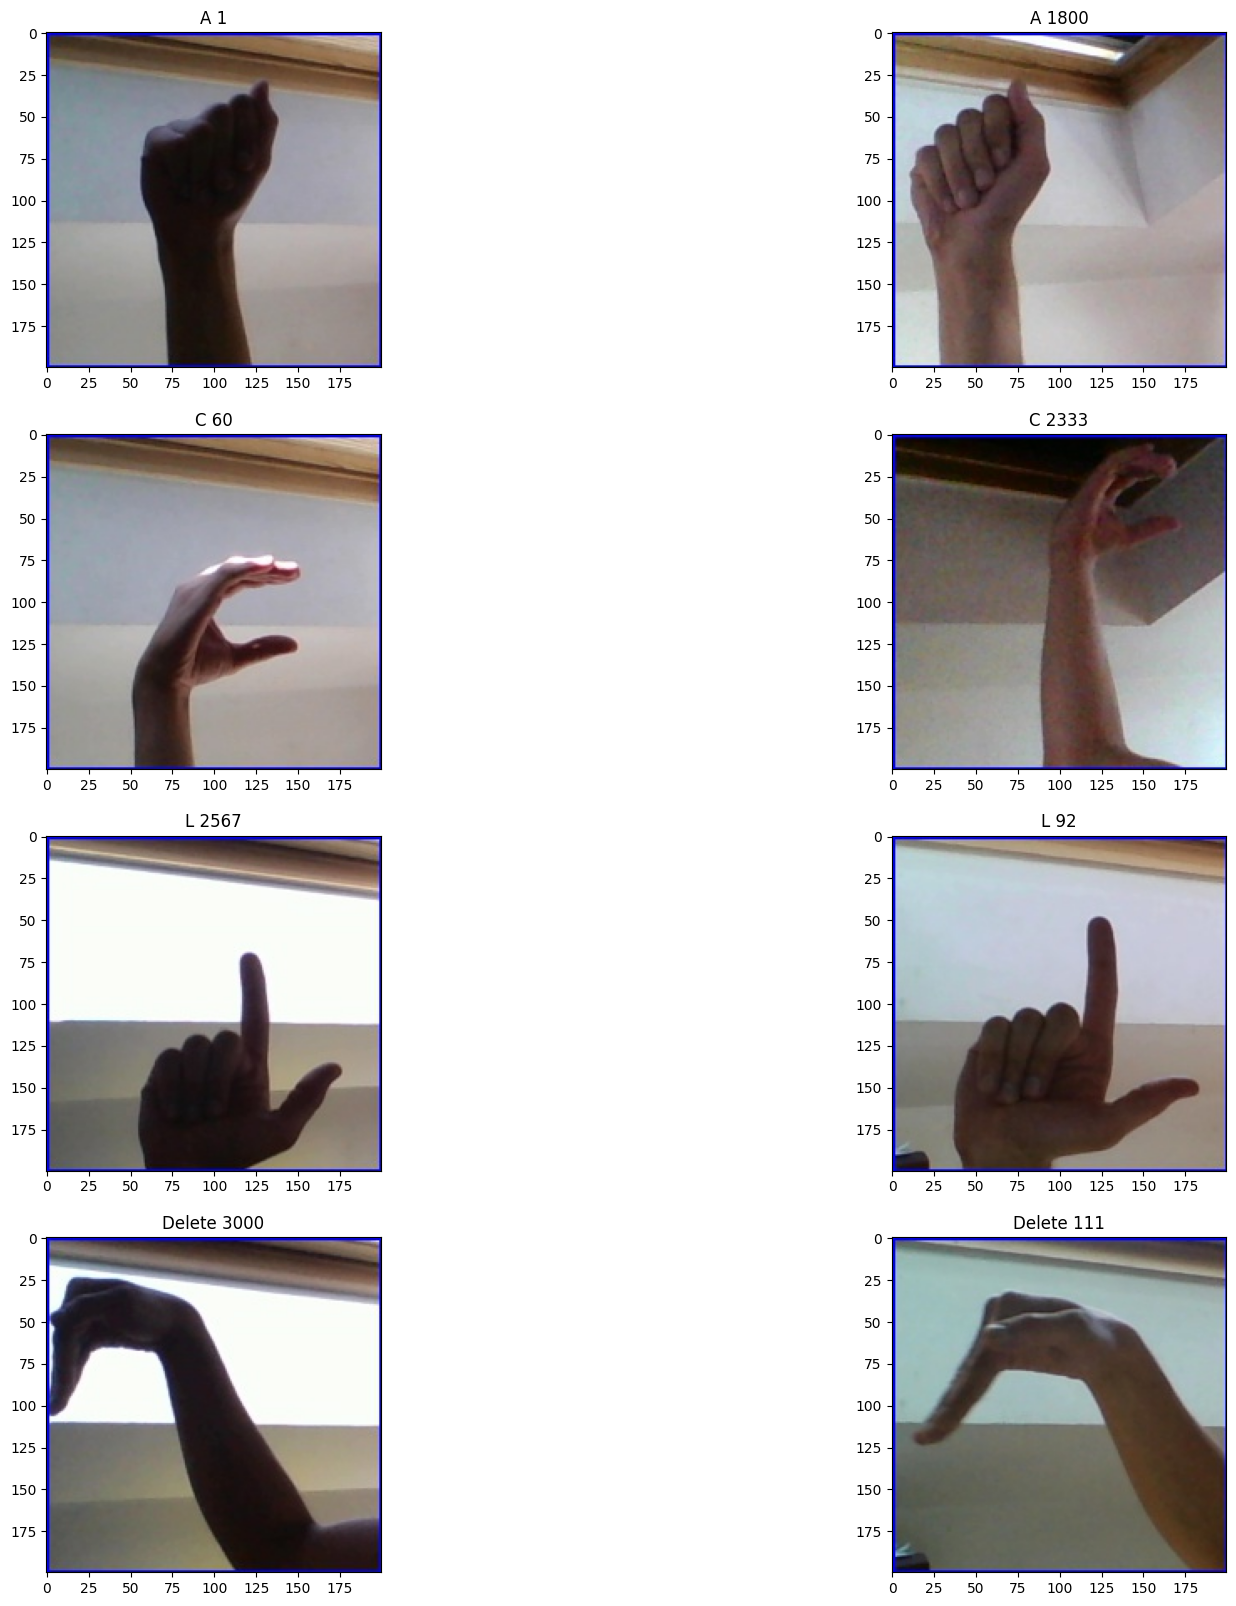

In [6]:
img1 = get_image(f'{raw_train_path}A/A1.jpg')
img2 = get_image(f'{raw_train_path}A/A1800.jpg')
img3 = get_image(f'{raw_train_path}C/C60.jpg')
img4 = get_image(f'{raw_train_path}C/C2333.jpg')
img5 = get_image(f'{raw_train_path}L/L2567.jpg')
img6 = get_image(f'{raw_train_path}L/L92.jpg')
img7 = get_image(f'{raw_train_path}del/del3000.jpg')
img8 = get_image(f'{raw_train_path}del/del111.jpg')

images = [img1, img2, img3, img4, img5, img6, img7, img8]
image_names = ['A 1', 'A 1800', 'C 60', 'C 2333', 'L 2567', 'L 92', 'Delete 3000', 'Delete 111']
disp_images(images, image_names)

# Move Data to Train, Test, and Validation Folders

In [25]:
import random
random.seed(92)

all_idx = list(range(len(info.keys())))

train_idx = sorted(random.sample(all_idx, 20))
for idx in train_idx:
    all_idx.remove(idx)
    
test_idx = sorted(random.sample(all_idx, 6))
for idx in test_idx:
    all_idx.remove(idx)
    
val_idx = all_idx

data_indexs = [train_idx, test_idx, val_idx]
data_paths = [train_path, test_path, val_path]
data_labels = ['train', 'test', 'val']

print(f'Train: {train_idx}\nTest: {test_idx}\nVal: {val_idx}')

Train: [0, 2, 3, 5, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28]
Test: [1, 4, 6, 11, 14, 20]
Val: [7, 22, 24]


In [48]:
from collections import defaultdict
import shutil

def copy_data(train_all, indexs, path):
    total = 0
    cur = 0
    info = defaultdict(list)
    for class_idx in indexs:
        class_path = train_all[class_idx]
        data_class = class_path.split('/')[-2]
        class_data = glob(class_path + '*.jpg')
        start = total
        for data_path in class_data:
            shutil.copy2(data_path, f'{path}{cur}.jpg')
            cur += 1
            total += 1
        info[data_class] = [start, total - 1]
    print(f'Images copied to: {path}')
    print(f'Total Images Copied: {total}')
    print(f'{info}')

    return info

In [49]:
data_ranges = defaultdict()
for data_idx, data_path, data_label in zip(data_indexs, data_paths, data_labels):
    data_ranges[data_label] = copy_data(train_all, data_idx, data_path)
data_ranges

Images copied to: /Users/jbuch808/Desktop/MS/EE-267/Project/code/demos/../../data/train/
Total Images Copied: 60000
defaultdict(<class 'list'>, {'A': [0, 2999], 'C': [3000, 5999], 'D': [6000, 8999], 'F': [9000, 11999], 'I': [12000, 14999], 'J': [15000, 17999], 'K': [18000, 20999], 'M': [21000, 23999], 'N': [24000, 26999], 'P': [27000, 29999], 'Q': [30000, 32999], 'R': [33000, 35999], 'S': [36000, 38999], 'T': [39000, 41999], 'V': [42000, 44999], 'X': [45000, 47999], 'Z': [48000, 50999], 'del': [51000, 53999], 'nothing': [54000, 56999], 'space': [57000, 59999]})
Images copied to: /Users/jbuch808/Desktop/MS/EE-267/Project/code/demos/../../data/test/
Total Images Copied: 18000
defaultdict(<class 'list'>, {'B': [0, 2999], 'E': [3000, 5999], 'G': [6000, 8999], 'L': [9000, 11999], 'O': [12000, 14999], 'U': [15000, 17999]})
Images copied to: /Users/jbuch808/Desktop/MS/EE-267/Project/code/demos/../../data/val/
Total Images Copied: 9000
defaultdict(<class 'list'>, {'H': [0, 2999], 'W': [3000, 5

defaultdict(None,
            {'train': defaultdict(list,
                         {'A': [0, 2999],
                          'C': [3000, 5999],
                          'D': [6000, 8999],
                          'F': [9000, 11999],
                          'I': [12000, 14999],
                          'J': [15000, 17999],
                          'K': [18000, 20999],
                          'M': [21000, 23999],
                          'N': [24000, 26999],
                          'P': [27000, 29999],
                          'Q': [30000, 32999],
                          'R': [33000, 35999],
                          'S': [36000, 38999],
                          'T': [39000, 41999],
                          'V': [42000, 44999],
                          'X': [45000, 47999],
                          'Z': [48000, 50999],
                          'del': [51000, 53999],
                          'nothing': [54000, 56999],
                          'space': [57000, 59999]})

# Save Useful Dataset Information

In [39]:
# Dictionary that maps index of class to class and vice versa
class_idx_to_class = defaultdict()
class_to_class_idx = defaultdict()

for data_label in data_ranges.keys():
    temp_i_to_c = defaultdict(str)
    temp_c_to_i = defaultdict(int)
    for i, c in enumerate(data_ranges[data_label].keys()):
        temp_i_to_c[i] = c
        temp_c_to_i[c] = i
    class_idx_to_class[data_label] = temp_i_to_c
    class_to_class_idx[data_label] = temp_c_to_i
class_idx_to_class

defaultdict(None,
            {'train': defaultdict(str,
                         {0: 'A',
                          1: 'C',
                          2: 'D',
                          3: 'F',
                          4: 'I',
                          5: 'J',
                          6: 'K',
                          7: 'M',
                          8: 'N',
                          9: 'P',
                          10: 'Q',
                          11: 'R',
                          12: 'S',
                          13: 'T',
                          14: 'V',
                          15: 'X',
                          16: 'Z',
                          17: 'del',
                          18: 'nothing',
                          19: 'space'}),
             'test': defaultdict(str,
                         {0: 'B', 1: 'E', 2: 'G', 3: 'L', 4: 'O', 5: 'U'}),
             'val': defaultdict(str, {0: 'H', 1: 'W', 2: 'Y'})})

In [40]:
class_to_class_idx

defaultdict(None,
            {'train': defaultdict(int,
                         {'A': 0,
                          'C': 1,
                          'D': 2,
                          'F': 3,
                          'I': 4,
                          'J': 5,
                          'K': 6,
                          'M': 7,
                          'N': 8,
                          'P': 9,
                          'Q': 10,
                          'R': 11,
                          'S': 12,
                          'T': 13,
                          'V': 14,
                          'X': 15,
                          'Z': 16,
                          'del': 17,
                          'nothing': 18,
                          'space': 19}),
             'test': defaultdict(int,
                         {'B': 0, 'E': 1, 'G': 2, 'L': 3, 'O': 4, 'U': 5}),
             'val': defaultdict(int, {'H': 0, 'W': 1, 'Y': 2})})

In [44]:
import pickle

data = {}
for data_label in data_ranges.keys():
    data[data_label] = {'data_ranges': data_ranges[data_label], 'class_to_class_idx': class_to_class_idx[data_label], 'class_idx_to_class': class_idx_to_class[data_label]}

with open('dataset_info.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
# Verify loading data
with open('dataset_info.pickle', 'rb') as handle:
    data2 = pickle.load(handle)
data2

{'train': {'data_ranges': defaultdict(list,
              {'A': [0, 2999],
               'C': [3000, 5999],
               'D': [6000, 8999],
               'F': [9000, 11999],
               'I': [12000, 14999],
               'J': [15000, 17999],
               'K': [18000, 20999],
               'M': [21000, 23999],
               'N': [24000, 26999],
               'P': [27000, 29999],
               'Q': [30000, 32999],
               'R': [33000, 35999],
               'S': [36000, 38999],
               'T': [39000, 41999],
               'V': [42000, 44999],
               'X': [45000, 47999],
               'Z': [48000, 50999],
               'del': [51000, 53999],
               'nothing': [54000, 56999],
               'space': [57000, 59999]}),
  'class_to_class_idx': defaultdict(int,
              {'A': 0,
               'C': 1,
               'D': 2,
               'F': 3,
               'I': 4,
               'J': 5,
               'K': 6,
               'M': 7,
       